## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [39]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [75]:
import requests
response = requests.get(target_url)
if response.status_code == requests.codes.ok:
    print("OK")

data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
print(type(data))
data[0:100]

OK
784594
<class 'str'>


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [174]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data_split = data.split(split_tag)
print(len(data_split))
print(type(data_split),'\n')

9996
<class 'list'> 



In [202]:
i=0
data_id=[]
data_path=[]
for data_str in data_split:
    try:
        data_id.append(data_str.split('\t')[0])
        data_path.append(data_str.split('\t')[1])
    except:
        print("except")
    
print(type(data_id))
print(len(data_id))
print(data_id[-2])
del data_id[-1]
print(type(data_path))
print(len(data_path))
print(data_path[-1])

except
<class 'list'>
9996
n00433802_5211
<class 'list'>
9995
http://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg


## 將 txt 轉成 pandas dataframe

In [203]:
import pandas as pd

data_dict = {'id': data_id,
             'Path': data_path}
    
df = pd.DataFrame(data_dict)
df.head()

,id,Path
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


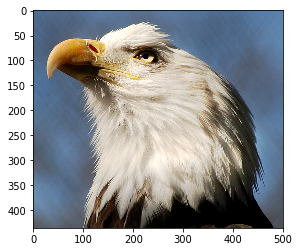

In [275]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0:2, 'Path'][0]             #df.loc[0:0, 'Path']取出含index的series資料，
                                                #df.loc[0:0, 'Path'][0]指定該欄第0筆資料，df.loc[0:0, 'Path'].values該欄全部資料
print(first_link)

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [287]:
def img2arr_fromURLs(url_list, resize = False, img_wdh = 224, img_hgt = 224):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    for im_url in url_list:
        try:
            response = requests.get(im_url)
            img = Image.open(BytesIO(response.content))
            if resize==True:
                img = img.resize((img_wdh, img_hgt))
            img_list.append(img)
        except:
            print("except")
        
    return img_list

except
except
Total images that we got: 4 


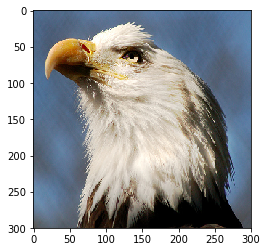

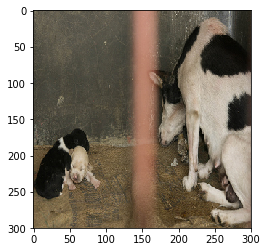

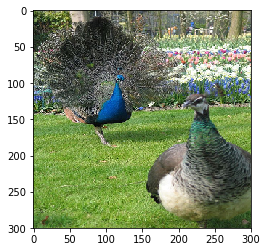

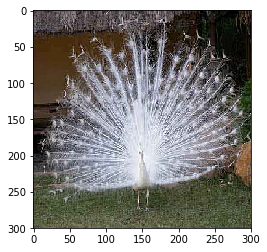

In [291]:
img_wdh = 300
img_hgt = 300
result = img2arr_fromURLs(df.loc[0:5, 'Path'].values, resize = True, img_wdh=img_wdh, img_hgt=img_hgt)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()